# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
city_names = []
fullset = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for c, lat_lng in enumerate(lat_lngs):
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities and pd.notnull(city):
        cities.append(city)
        city_names.append(city)
        fullset.append(c)
        
# Reduce the lat/longs using the fullset list
lats = [lats[c] for c in fullset]
lngs = [lngs[c] for c in fullset]

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
      
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp (F)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Albany
Processing Record 2 of Set 1 | Kingscliff
Processing Record 3 of Set 1 | Little Cayman
City not found. Skipping...
Processing Record 4 of Set 1 | Cidreira
Processing Record 5 of Set 1 | Ushuaia
Processing Record 6 of Set 1 | Longyearbyen
Processing Record 7 of Set 1 | Luderitz
Processing Record 8 of Set 1 | Atafu Village
Processing Record 9 of Set 1 | Hilo
Processing Record 10 of Set 1 | St. John'S
Processing Record 11 of Set 1 | Hermanus
Processing Record 12 of Set 1 | Dudinka
Processing Record 13 of Set 1 | El Granada
Processing Record 14 of Set 1 | Margaret River
Processing Record 15 of Set 1 | Constitucion
Processing Record 16 of Set 1 | Waitangi
Processing Record 17 of Set 1 | Port-Aux-Francais
Processing Record 18 of Set 1 | Kailua-Kona
Processing Record 19 of Set 1 | Minas De Marcona
Processing Record 20 of Set 1 | Nadym
Processing Record 21 of Set 1 | Anadyr
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            575
Lat             575
Lng             575
Max Temp (F)    575
Humidity        575
Cloudiness      575
Wind Speed      575
Country         575
Date            575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,64.17,46,36,8.90,US,1685055505
1,Kingscliff,-28.2667,153.5667,66.76,68,18,11.50,AU,1685056027
2,Cidreira,-30.1811,-50.2056,69.06,90,4,11.52,BR,1685056028
3,Ushuaia,-54.8000,-68.3000,35.26,80,20,10.36,AR,1685055744
4,Longyearbyen,78.2186,15.6401,31.84,93,100,23.02,SJ,1685056028


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Albany,42.6001,-73.9662,64.17,46,36,8.90,US,1685055505
1,Kingscliff,-28.2667,153.5667,66.76,68,18,11.50,AU,1685056027
2,Cidreira,-30.1811,-50.2056,69.06,90,4,11.52,BR,1685056028
3,Ushuaia,-54.8000,-68.3000,35.26,80,20,10.36,AR,1685055744
4,Longyearbyen,78.2186,15.6401,31.84,93,100,23.02,SJ,1685056028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

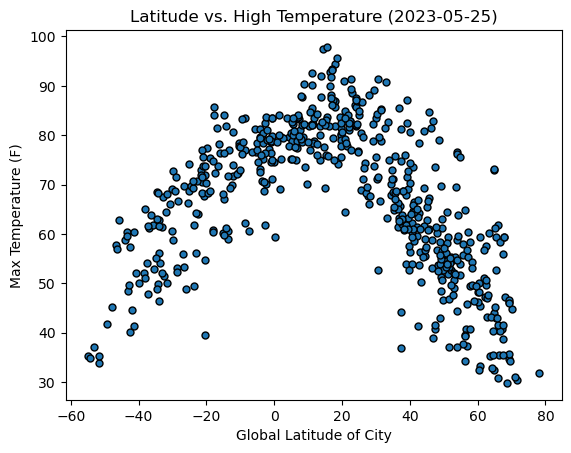

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp (F)"].astype("float")
plt.scatter(x_values,y_values, c='C0', s=25, edgecolors='0.0')

# Get the date from the dataframe
date_unix = city_data_df["Date"].iloc[1]
date = pd.to_datetime(date_unix, unit='s').strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Max Temperature (F)')
plt.title(f'Latitude vs. High Temperature ({date})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

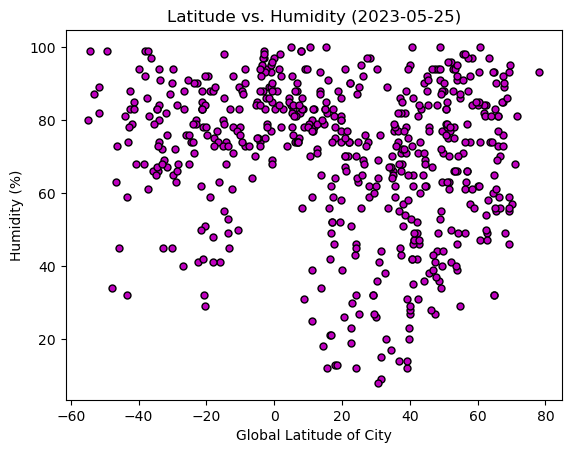

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, c='m', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity ({date})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

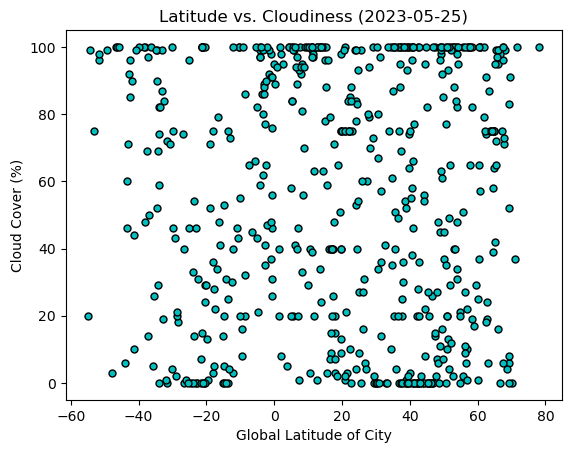

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, c='c', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Cloud Cover (%)')
plt.title(f'Latitude vs. Cloudiness ({date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

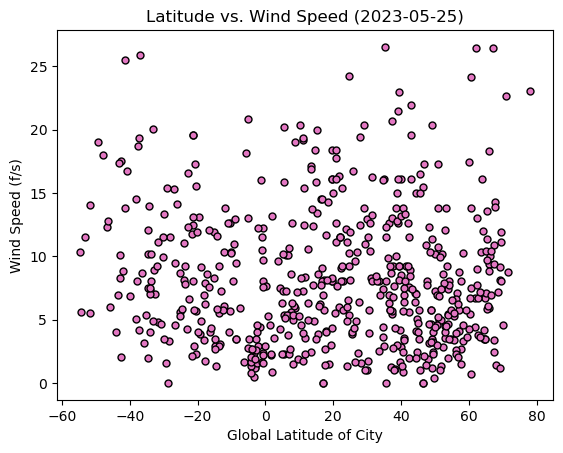

In [13]:
# Build the scatter plots for latitude vs. Wind Speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, c='C6', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Wind Speed (f/s)')
plt.title(f'Latitude vs. Wind Speed ({date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Albany,42.6001,-73.9662,64.17,46,36,8.90,US,1685055505
4,Longyearbyen,78.2186,15.6401,31.84,93,100,23.02,SJ,1685056028
7,Hilo,19.7297,-155.0900,80.33,80,40,16.11,US,1685055897
8,St. John'S,47.5649,-52.7093,40.68,94,100,8.05,CA,1685055927
10,Dudinka,69.4058,86.1778,34.63,93,83,11.12,RU,1685056031


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Kingscliff,-28.2667,153.5667,66.76,68,18,11.50,AU,1685056027
2,Cidreira,-30.1811,-50.2056,69.06,90,4,11.52,BR,1685056028
3,Ushuaia,-54.8000,-68.3000,35.26,80,20,10.36,AR,1685055744
5,Luderitz,-26.6481,15.1594,53.28,83,0,9.44,NaN,1685056029
6,Atafu Village,-8.5421,-172.5159,83.50,73,32,9.46,TK,1685056029


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6692921356061056


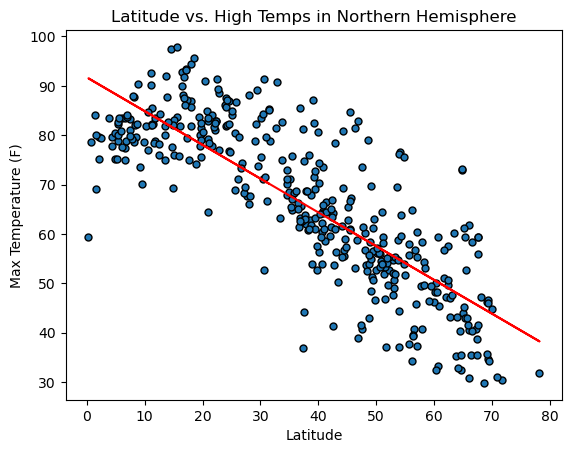

In [18]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp (F)"].astype("float")
plt.scatter(x_values,y_values, c='C0', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs. High Temps in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.6152344051468661


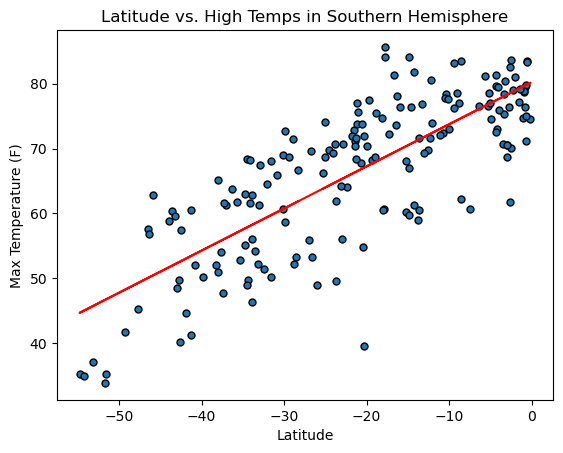

In [20]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp (F)"].astype("float")
plt.scatter(x_values,y_values, c='C0', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs. High Temps in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00014277231950370894


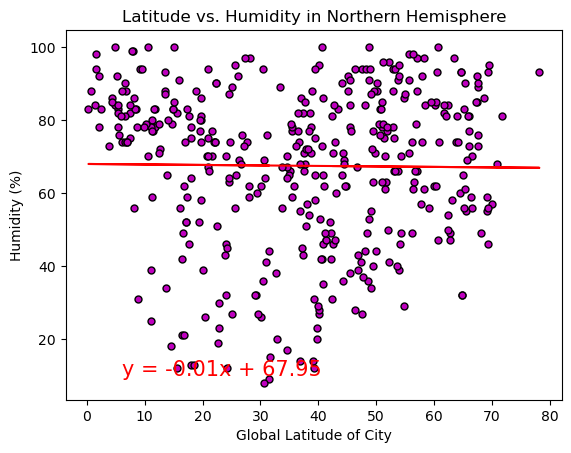

In [21]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, c='m', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.02475582765371372


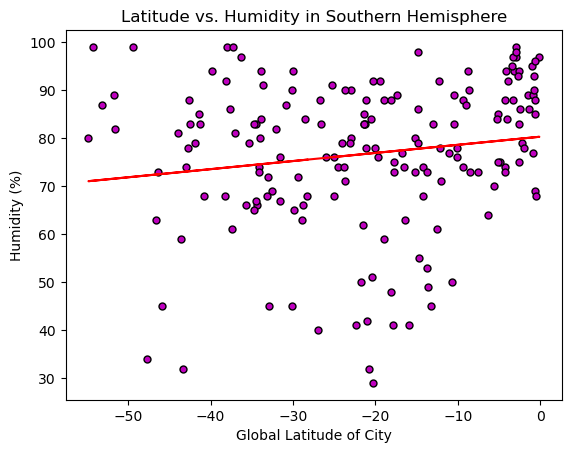

In [22]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, c='m', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0038576924675860994


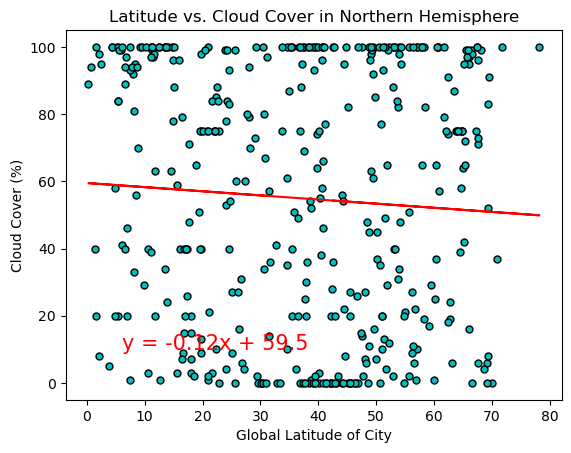

In [23]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, c='c', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Cloud Cover (%)')
plt.title("Latitude vs. Cloud Cover in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.00022590547025831223


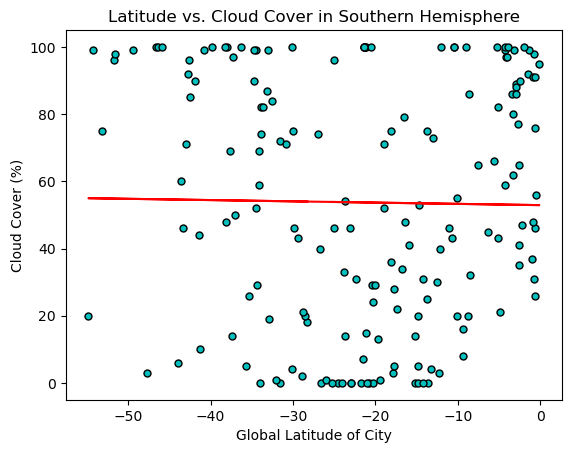

In [24]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, c='c', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Cloud Cover (%)')
plt.title("Latitude vs. Cloud Cover in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0005877882424887085


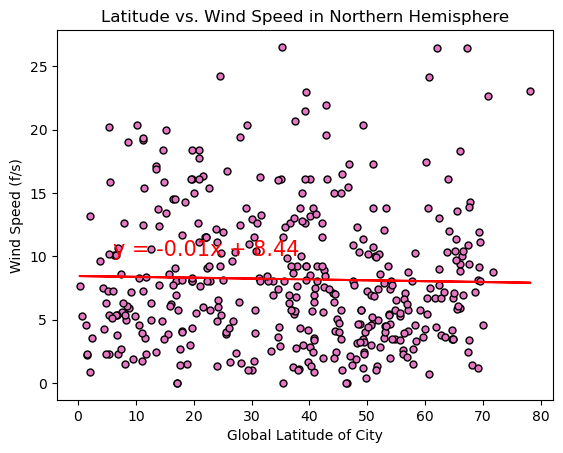

In [25]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. Wind Speed
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, c='C6', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Wind Speed (f/s)')
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.12123209223498188


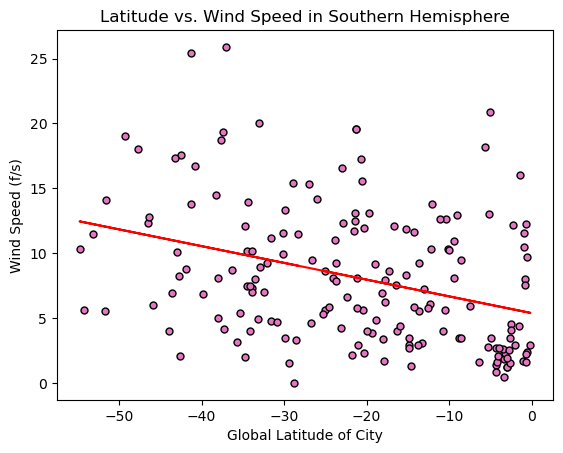

In [26]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. Wind Speed
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, c='C6', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Wind Speed (f/s)')
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE